In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


In [4]:
# Convert 'hour_beginning' data type from string to a “native” date/time format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.info()
df['hour_beginning'].head(5)

/var/folders/0k/zhb1q6h92kz74x3ybz0288dr0000gn/T/ipykernel_55748/502940574.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


0   2019-04-30 00:00:00
1   2019-12-31 22:00:00
2   2019-12-31 23:00:00
3   2019-12-31 21:00:00
4   2019-04-01 03:00:00
Name: hour_beginning, dtype: datetime64[ns]

In [5]:
# You may notice that the hour_beginning variable includes the full date and time in one field. For our analysis, 
# it would be more useful to have separate fields for the date, month, day of the week, and hour.
# can create these additional fields by assigning the desired value to them directly - then, observe the effect:

df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday


## Inspect (and possibly clean/filter) the data

In [6]:
# Arranging data in chronological order first and then proceeding to forward/back fill
df = df.sort_values(by='hour_beginning') 
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
8846,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
9473,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
10098,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
10733,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
11527,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


In [7]:
# Reset index. drop=True discards the current index, inplace=True applies changes to the df
df.reset_index(drop=True, inplace=True)  
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


In [8]:
# Fill in missing data using the fillna function (reference). We will fill the missing weather data using the “forward fill” method, which caries the last valid observation forward to fill in NAs.
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")

/var/folders/0k/zhb1q6h92kz74x3ybz0288dr0000gn/T/ipykernel_55748/2087886352.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['temperature'] = df['temperature'].fillna(method="ffill")
/var/folders/0k/zhb1q6h92kz74x3ybz0288dr0000gn/T/ipykernel_55748/2087886352.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['precipitation'] = df['precipitation'].fillna(method="ffill")
/var/folders/0k/zhb1q6h92kz74x3ybz0288dr0000gn/T/ipykernel_55748/2087886352.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


In [9]:
# Check if null data has been filled
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature              0
precipitation            0
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

## Take Home Problems

### 1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Counts For Each Day of the Week')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Pedestrian Count')

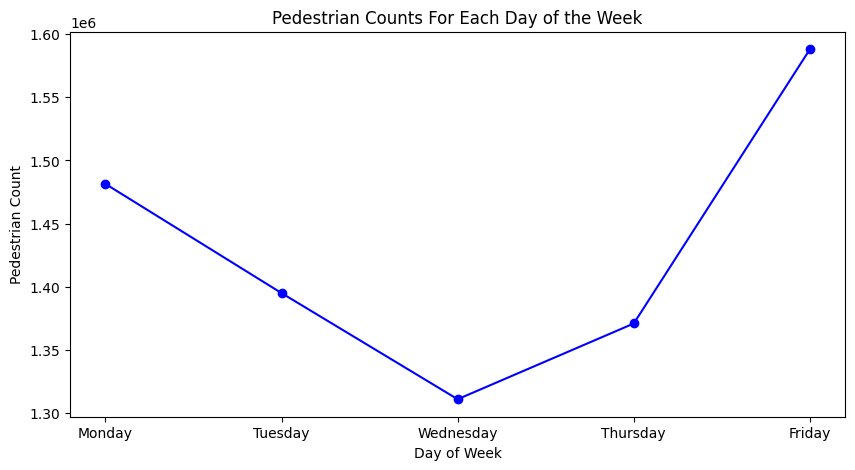

In [ ]:
# df.head()

# Filter data to include only weekdays (Monday to Friday)
weekdays_df = df[df['hour_beginning'].dt.weekday < 5]
# weekdays_df['day_name'].value_counts()

# Groups the data by weekday and adds up all the pedestrians counts for each weekday
weekdays_counts = weekdays_df.groupby('day_name')['Pedestrians'].sum()
# print(weekdays_counts)

# Reindex
weekdays_counts = weekdays_counts.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

# Line Plot showing the pedestrian counts for each day of the week
plt.figure(figsize=(10, 5))
plt.plot(weekdays_counts.index, weekdays_counts.values, color='blue', marker='o')
plt.title('Pedestrian Counts For Each Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Pedestrian Count')
plt.show()

### 2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

weather_summary
partly-cloudy-day      1574.093627
clear-day              1382.183298
wind                    679.000000
cloudy                  541.737624
rain                    229.822076
snow                    222.631579
fog                     212.409091
sleet                   178.250000
partly-cloudy-night      52.596867
clear-night              33.150134
Name: Pedestrians, dtype: float64


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Pedestrians Counts and Weather Patterns')

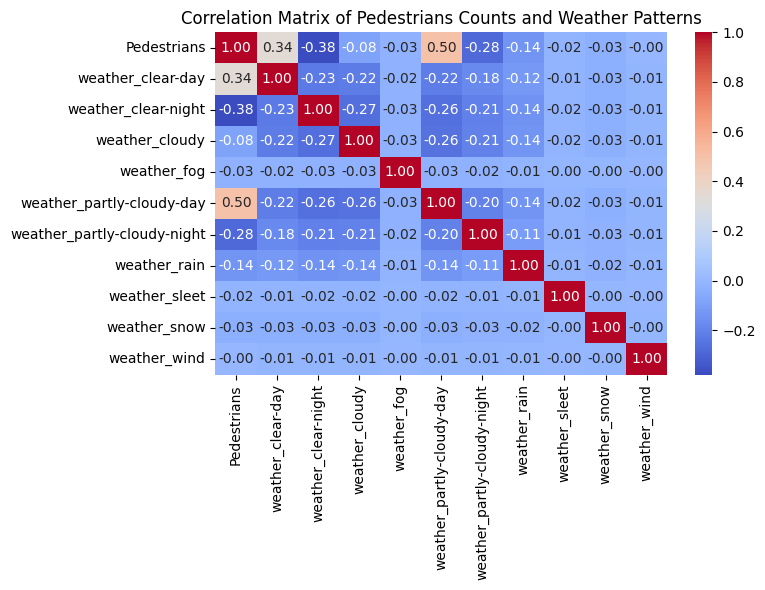

In [15]:
# Filter only year 2019 data
df_2019 = df[df['hour_beginning'].dt.year == 2019]

# Sort the pedestrian count data by weather summary
weather_counts = df_2019.groupby('weather_summary')['Pedestrians'].mean().sort_values(ascending=False)
print(weather_counts)

# One-hot encode the categorical weather summary
weather_dummies = pd.get_dummies(df_2019['weather_summary'], prefix='weather')

# Build a new dataframe with pedestrians + encoded weather
corr_df = pd.concat([df_2019['Pedestrians'], weather_dummies], axis=1)

# Creating a correlation matrix
correlation_matrix = corr_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians Counts and Weather Patterns')
plt.tight_layout()
plt.show()

### 3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Counts For Each Time of the Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Pedestrian Count')

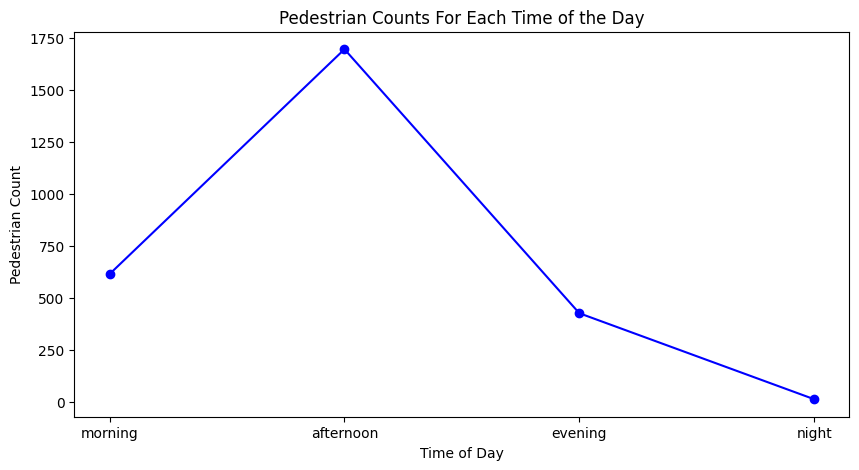

In [24]:
# Function to categorize time of day into morning, afternoon, evening, and night
def get_time_of_day(hour):
  if 6 <= hour < 12:
    return "morning"
  elif 12 <= hour < 18:
    return "afternoon"
  elif 18 <= hour < 24:
    return "evening"
  else:
    return "night"

# Create a new column in the dataframe to store these categories
df["time_of_day"] = df['hour'].apply(get_time_of_day)
# df.head(15)

# Create a Line Plot to analyze pedestrian activity patterns throughout the day
day_counts_df = df.groupby("time_of_day")["Pedestrians"].mean()
day_counts_df = day_counts_df.reindex(["morning", "afternoon", "evening", "night"])

plt.figure(figsize=(10, 5))
plt.plot(day_counts_df.index, day_counts_df.values, color='blue', marker='o')
plt.title('Pedestrian Counts For Each Time of the Day')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.show()